<a href="https://colab.research.google.com/github/jpraveenkanna/Practice-notebooks/blob/master/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt


In [63]:
#linear regression --> y=wx+c
x = torch.arange(1,11).float()
y = x*0.3
w = torch.randn(10).requires_grad_()

def model(x,w):
  return w*x

prediction = model(x,w)
x,prediction

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([-0.7654, -2.1269,  3.2905,  3.0529,  2.2417,  1.6250, -4.3936, -2.7549,
         -2.3082, -8.7089], grad_fn=<MulBackward0>))

In [65]:
def mse(p,t):
  return ((p-t)**2).mean()
loss = mse(prediction,y)
loss

tensor(24.9220, grad_fn=<MeanBackward0>)

In [66]:
loss.backward()
w.grad

tensor([ -0.2131,  -1.0908,   1.4343,   1.4823,   0.7417,  -0.2100,  -9.0911,
         -8.2478,  -9.0148, -23.4178])

In [77]:
def epoch(w,lr = 1e-2):
  prediction = model(x,w)
  loss = mse(prediction,y)
  loss.backward()
  w.data -=  lr*w.grad.data
  w.grad = None
  print("Loss: ",loss.item())

w = torch.randn(10).requires_grad_()


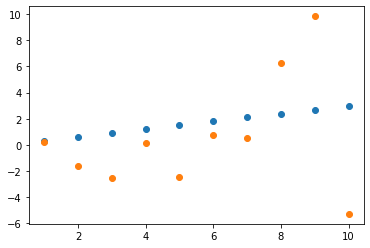

In [78]:
import matplotlib.pyplot as plt
def plot_graph(w):
  preds = model(x,w)
  ax = plt.subplot()
  ax.scatter(x,y)
  ax.scatter(x,preds.detach().numpy())

plot_graph(w)

Step: 1 Loss:  0.021420113742351532
Step: 2 Loss:  0.021069230511784554
Step: 3 Loss:  0.02072448842227459
Step: 4 Loss:  0.020385773852467537
Step: 5 Loss:  0.020052963867783546
Step: 6 Loss:  0.019725952297449112
Step: 7 Loss:  0.01940462365746498
Step: 8 Loss:  0.019088875502347946
Step: 9 Loss:  0.018778594210743904
Step: 10 Loss:  0.018473675474524498


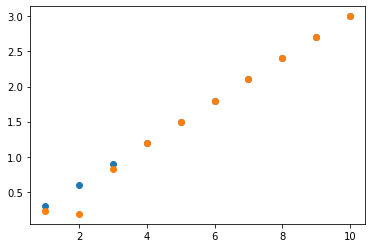

In [99]:
for idx in range(1,11):
  print("Step:",idx,end = " ")
  epoch(w)
plot_graph(w)

# precision and recall

In [ ]:
!wget -O pre_recall.png "https://miro.medium.com/max/1520/1*PULzWEven_XAZjiMNizDCg.png"

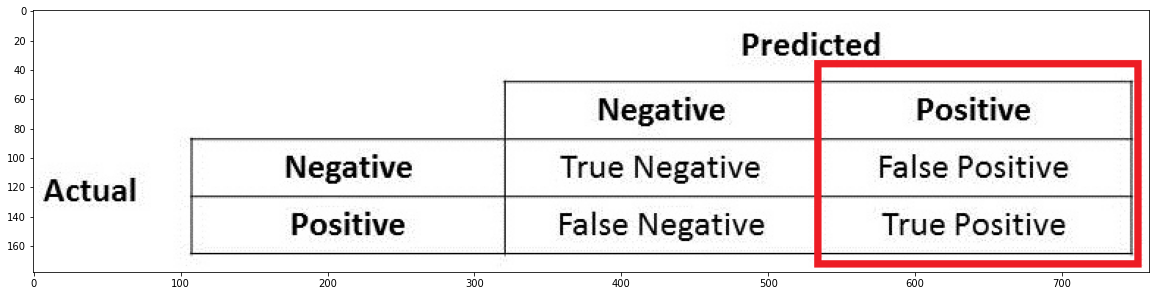

In [105]:
import matplotlib.image as img 
im = img.imread('pre_recall.png')

plt.figure(figsize=(20,10))
plt.imshow(im)  

In [ ]:
!wget -O formula.jpg "https://static.packt-cdn.com/products/9781785282287/graphics/B04223_10_02.jpg"

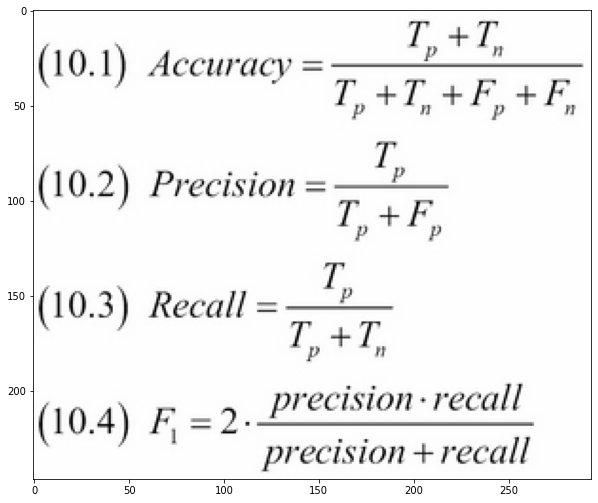

In [109]:

im = img.imread('formula.jpg')

plt.figure(figsize=(10,10))
plt.imshow(im)  

## Bayes theorem

In [110]:
!wget -O bayes.jpg "https://image.slidesharecdn.com/accap7bncs-110517152255-phpapp01/95/lesson-72-bayesian-network-classifiers-6-638.jpg"

--2020-10-26 17:01:31--  https://image.slidesharecdn.com/accap7bncs-110517152255-phpapp01/95/lesson-72-bayesian-network-classifiers-6-638.jpg
Resolving image.slidesharecdn.com (image.slidesharecdn.com)... 88.221.130.42
Connecting to image.slidesharecdn.com (image.slidesharecdn.com)|88.221.130.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85823 (84K) [image/jpeg]
Saving to: ‘bayes.jpg’

bayes.jpg           100%[===================>]  83.81K  --.-KB/s    in 0.04s   

2020-10-26 17:01:31 (2.01 MB/s) - ‘bayes.jpg’ saved [85823/85823]



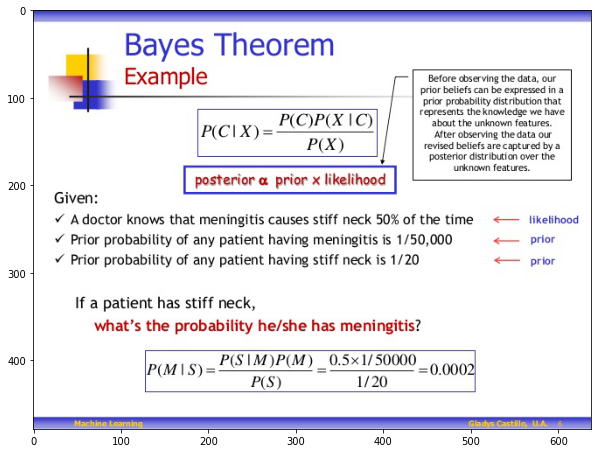

In [111]:

im = img.imread('bayes.jpg')

plt.figure(figsize=(10,10))
plt.imshow(im)  

## Calculate output size of convd

In [112]:
!wget "https://i.stack.imgur.com/vD1u3.png"

--2020-10-26 17:04:56--  https://i.stack.imgur.com/vD1u3.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.24.34, 104.16.31.34, 104.16.26.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.24.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10343 (10K) [image/png]
Saving to: ‘vD1u3.png’

vD1u3.png           100%[===================>]  10.10K  --.-KB/s    in 0s      

2020-10-26 17:04:56 (77.4 MB/s) - ‘vD1u3.png’ saved [10343/10343]



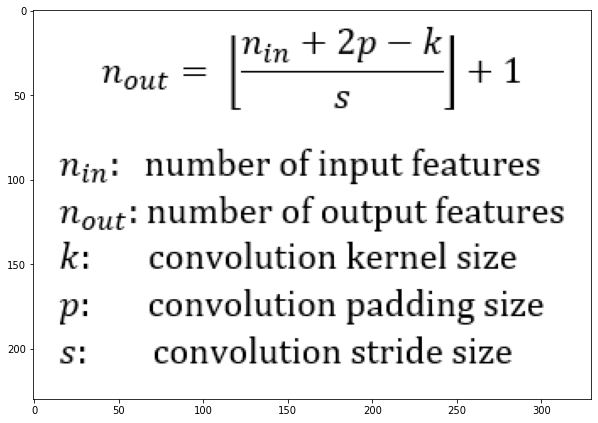

In [113]:

im = img.imread('vD1u3.png')

plt.figure(figsize=(10,10))
plt.imshow(im)  

Computation in a neural network involves multiplication and addition.

**Calulating FLOPS in dense layer:**
 
A dense layer involve multiply the activation of a neuron with weight.

This operation is called MACs - Multiply Accumulate

any values with a floating point is called FLOP - Floating point operation
1MAC can be  = 2 FLOPs

How many MACs will we have to perform to get the output from a fully connected network with 250 input neurons and 100 output neurons?
25000

Can you calculate the total number of FLOPs for the network in the previous quiz?
50000

to calculate the total MACs in a dense layer, we need to multiply the total number of neurons in the input to that layer by the number of neurons in the output of that layer. This means that the more neurons or parameters these layers have, the more computation will have to be performed.


**1. Calculating Model FLOPS: Convolutional Layers**

input image shape of 10x10x3 with kernal shape of 3x3x3 produces
outputshape = (inputshape - kernal shape)+1
	    = (10-3)+1
            = 8 ==> 8x8x1
imp: when we apply 1 kernel, the output depth is always 1.

if we apply 128 3x3 kernal than depth will be 128 ==>8x8x128

eg: To generate 128 8x8 feature maps from 1 10x10 RGB image we have to use 128 3x3x3 filters

So total MACs = 128x3x3x3x8x8 = 2,21,184
	FLOPs = 4,42,368


Inference time calculation from FLOPS

let hardware have 1GF LOPS = 1,000,000,000

so time taken = 442,368/1,000,000,000 = 0.442 ms




FLOPs stands for floating-point operations and refers to a quantity.

FLOPS stands for floating-point operations and refers to a rate.

For example, if we say "100 FLOPs", we are simply referring to the number of operations—whereas if we say, "100 FLOPS", this is referring to the number of operations a model performs in a second.



For a convolutional layer, the total number of MACs is the product of the output shape, the number of kernels and the kernel shape.



The output from the previous convolutional layer is going to have a shape of 24x24x5. When flattened, this will form a vector of shape 2,880. To calculate the total number of MACs in an FC layer, we need to multiply the input size with the output size. Multiplying that product with 2 will give us the total number of FLOPS.

In this case, that will be 2880x128x2 which is 737,280.

To calculate the MACs for the last layer, we need to multiply 128 with 10 which is 1,280 MACs. Multiplying that with 2 gives us 2,560 which is the total number of FLOPS for the last layer.


** 2. Pooling layers: **
Pooling layers are subsampling layers that reduce the amount of data or parameters being passed from one layer to another.

The two most commonly used pooling layers are average pooling and max pooling.

input image 30x30x3
filter 2x2
stride 2

FLOPS = height * width* depth = 30*30*3 = 2700 FLOPS
output shape = 15x15x3


**3. Seperable convolution**
3.1 Depth wise convolution
3.2 Pointwise convolution

input image of shape 10x10x3
kernel shape 3x3x3  --> 128
output shape = 8x8x3 

depth wise:
MACs = 3*3*3*1*8*8
* to calculate the total number of MACs, you need to multiply the output shape of the layer and shape of each kernel. You will also need to multiply that value with 2 to get the total number of FLOPs.

pointwise:
MACS = 128*1*1*3*8*8 = 24,576
* the height and depth of a pointwise filter is always 1. The depth of the filter will be equal to the depth of the input.
* in a pointwise layer, the output height and depth remains the same. Only the depth changes. Since we are applying only one filter, the output depth will be 1.



total = 1728+24,576

normal convolution --> image transfered to x128
Seperable convolution --> image transfered once. then elongated x128


**Pruning** is a model compression technique where redundant network parameters are removed while trying to preserve the original accuracy (or other metric) of the network



 



